### Import Modules, Change Directory, Set Variables

In [1]:
import_location = '/Users/johnmccloskey/Development/opengamedata/jupyter/jowilder_data'
export_location = 'jowilder_graphs'

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from datetime import date
import numpy as np

In [3]:
files = os.listdir(import_location)
tsv_files = [f for f in files if f.endswith('sv')]
print(f"{'-'*5} {os.path.split(import_location)[-1]} {'-'*5}" )
print(*[f'{i}: {f}' for i, f in enumerate(tsv_files)][:10], sep='\n')

----- jowilder_data -----
0: 20191220_assessment_4.tsv
1: 12182019 jowidler assessment 4.tsv


In [4]:
import_n = 0

### Import

In [5]:
df = pd.read_csv(os.path.join(import_location,tsv_files[import_n]), sep='\t',index_col='sessionID')
print(df.shape)
df.head()

(341, 380)


,lvl0_EventCount,lvl0_count_clicks,lvl0_count_hovers,lvl0_avgTimePerTextBox,lvl0_time_in_level,lvl0_meaningful_action_count,lvl0_words_per_second,lvl0_count_notebook_uses,lvl0_avg_time_between_clicks,lvl1_EventCount,...,sess_avgTimePerWord,sess_avgTimePerTextBox,sess_stDevTimePerTextBox,sess_words_per_second,sess_count_notebook_uses,sess_avg_time_between_clicks,save_code,music,hq,fullscreen
sessionID,,,,,,,,,,,,,,,,,,,,,
19110000090781600,34,26.0,6.0,1.672167,63.535,3.0,3.970336,NaN,2.096680,30.0,...,0,16.005742,0,4.125283,8,161.139635,0,1,0,0
19110009114094480,21,18.0,1.0,1.839250,44.510,1.0,4.523686,NaN,1.195588,27.0,...,0,7.617183,0,4.731634,6,2.034186,donethework,1,0,0
19110012454548376,43,36.0,5.0,1.545500,73.820,4.0,6.184182,NaN,1.584343,114.0,...,0,7.371897,0,7.551905,11,1.610426,0,1,1,True
19110013234266620,2,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,...,0,4.979176,0,9.855149,6,1.309599,0,1,0,0
19110014392453668,2,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,...,0,6.194067,0,6.349095,1,1.576921,0,1,0,0


In [6]:
list(df.columns)

['lvl0_EventCount',
 'lvl0_count_clicks',
 'lvl0_count_hovers',
 'lvl0_avgTimePerTextBox',
 'lvl0_time_in_level',
 'lvl0_meaningful_action_count',
 'lvl0_words_per_second',
 'lvl0_count_notebook_uses',
 'lvl0_avg_time_between_clicks',
 'lvl1_EventCount',
 'lvl1_count_clicks',
 'lvl1_count_hovers',
 'lvl1_avgTimePerTextBox',
 'lvl1_time_in_level',
 'lvl1_meaningful_action_count',
 'lvl1_words_per_second',
 'lvl1_count_notebook_uses',
 'lvl1_avg_time_between_clicks',
 'lvl2_EventCount',
 'lvl2_count_clicks',
 'lvl2_count_hovers',
 'lvl2_avgTimePerTextBox',
 'lvl2_time_in_level',
 'lvl2_meaningful_action_count',
 'lvl2_words_per_second',
 'lvl2_count_notebook_uses',
 'lvl2_avg_time_between_clicks',
 'lvl3_EventCount',
 'lvl3_count_clicks',
 'lvl3_count_hovers',
 'lvl3_avgTimePerTextBox',
 'lvl3_time_in_level',
 'lvl3_meaningful_action_count',
 'lvl3_words_per_second',
 'lvl3_count_notebook_uses',
 'lvl3_avg_time_between_clicks',
 'lvl4_EventCount',
 'lvl4_count_clicks',
 'lvl4_count_hover

### Drop Rows with save_codes (continues) or no answers

In [7]:
df = df.drop(df[df['save_code'] != '0'].index)
print(df.shape)
answer_cols = [ 'R0_quiz_response','R1_quiz_response','R2_quiz_response']
for c in answer_cols:
    df[c] = df[c].astype(int)
    df = df.drop(df[df[c] == -1].index)
print(df.shape)
df[answer_cols].head()

(288, 380)
(116, 380)


,R0_quiz_response,R1_quiz_response,R2_quiz_response
sessionID,,,
19110000090781600,0,1,1
19110012454548376,1,2,3
19110017124036790,0,2,0
19110020180962532,0,2,0
19110106331489300,0,2,0


In [8]:
df.dropna(subset=['lvl0_EventCount'])
list(df.columns)

['lvl0_EventCount',
 'lvl0_count_clicks',
 'lvl0_count_hovers',
 'lvl0_avgTimePerTextBox',
 'lvl0_time_in_level',
 'lvl0_meaningful_action_count',
 'lvl0_words_per_second',
 'lvl0_count_notebook_uses',
 'lvl0_avg_time_between_clicks',
 'lvl1_EventCount',
 'lvl1_count_clicks',
 'lvl1_count_hovers',
 'lvl1_avgTimePerTextBox',
 'lvl1_time_in_level',
 'lvl1_meaningful_action_count',
 'lvl1_words_per_second',
 'lvl1_count_notebook_uses',
 'lvl1_avg_time_between_clicks',
 'lvl2_EventCount',
 'lvl2_count_clicks',
 'lvl2_count_hovers',
 'lvl2_avgTimePerTextBox',
 'lvl2_time_in_level',
 'lvl2_meaningful_action_count',
 'lvl2_words_per_second',
 'lvl2_count_notebook_uses',
 'lvl2_avg_time_between_clicks',
 'lvl3_EventCount',
 'lvl3_count_clicks',
 'lvl3_count_hovers',
 'lvl3_avgTimePerTextBox',
 'lvl3_time_in_level',
 'lvl3_meaningful_action_count',
 'lvl3_words_per_second',
 'lvl3_count_notebook_uses',
 'lvl3_avg_time_between_clicks',
 'lvl4_EventCount',
 'lvl4_count_clicks',
 'lvl4_count_hover

In [9]:
df['R0_quiz_response'].head()

sessionID
19110000090781600    0
19110012454548376    1
19110017124036790    0
19110020180962532    0
19110106331489300    0
Name: R0_quiz_response, dtype: int64

sessionID
19110000090781600    3.0
19110012454548376    4.0
19110017124036790    5.0
19110020180962532    3.0
19110106331489300    3.0
Name: assess_1_tot_guesses, dtype: float64

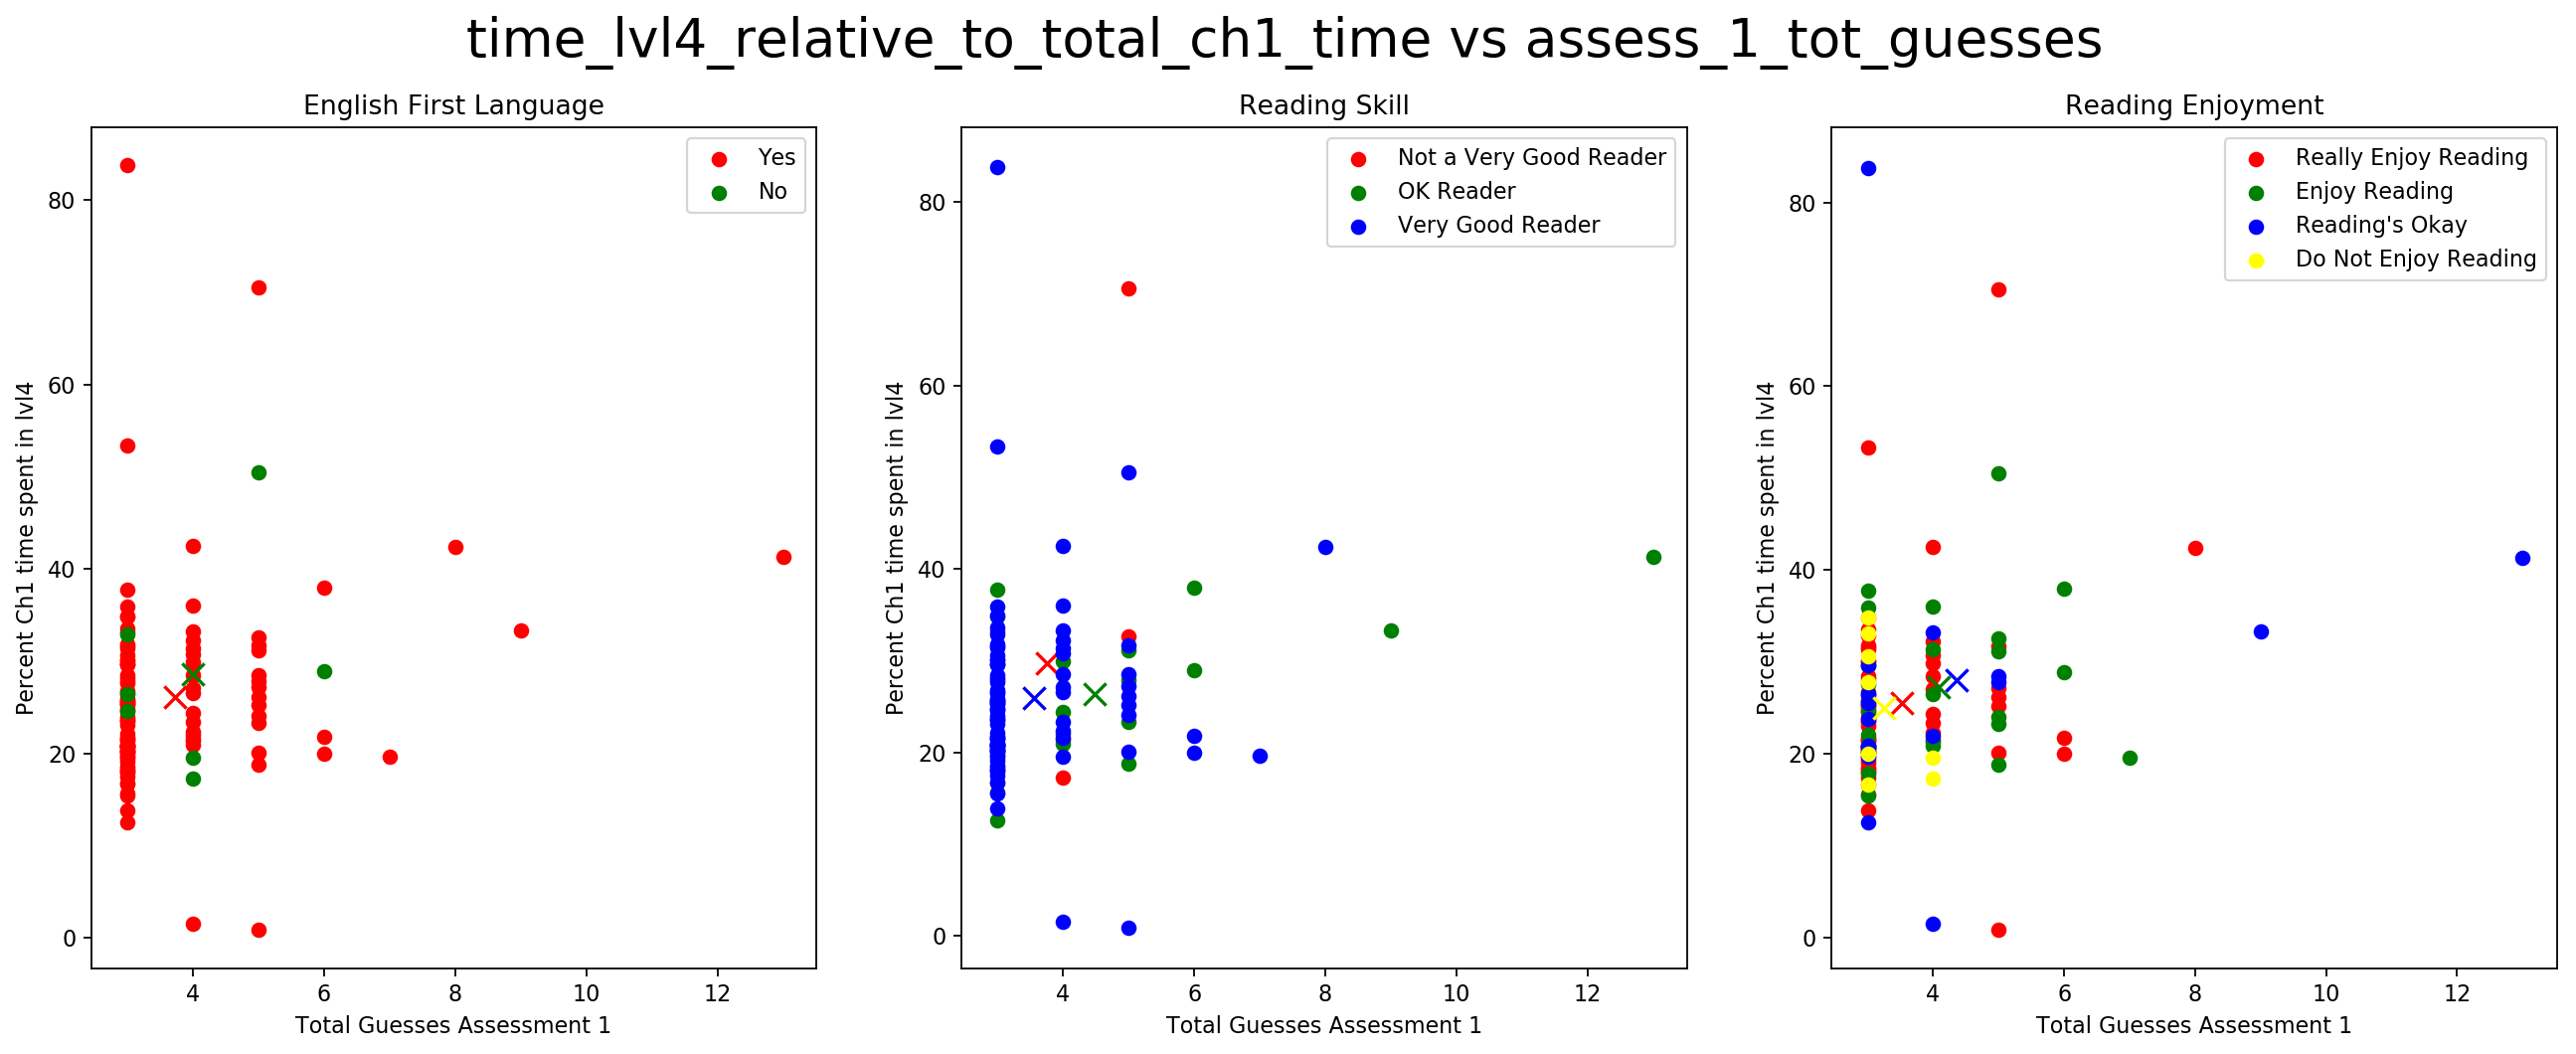

In [75]:
answer_labels = [('Yes','No'),('Not a Very Good Reader', 'OK Reader','Very Good Reader'),('Really Enjoy Reading', 'Enjoy Reading',"Reading's Okay","Do Not Enjoy Reading")]
titles = ['English First Language', 'Reading Skill', 'Reading Enjoyment']
def scatter(x_axis_feat, y_axis_feat, xlabel, ylabel,label=None, legend_labels=None, title=None, colors=None, **kwargs):
    label = label or 'R1_quiz_response'
    colors = np.array(colors) or np.array(["red", "green","blue","yellow"])
    tdf = df.dropna(subset=[x_axis_feat, y_axis_feat])
    for ans,label_name, color in zip([0,1,2,3],legend_labels, colors):
        plot_df = tdf[tdf[label] == ans]
        title = title or f'{y_axis_feat} vs. {x_axis_feat} (n={len(tdf)})'
        scatter = plt.scatter(plot_df[x_axis_feat],plot_df[y_axis_feat],
                     c=color, label=label_name, **kwargs)
        mean_df = plot_df = plot_df.mean()
        plt.scatter(mean_df[x_axis_feat], mean_df[y_axis_feat], c=color, s=100, marker='x')
        plt.xlabel(xlabel)
        plt.title(title)
        plt.ylabel(ylabel)
        plt.legend()
        
def all_question_plots(x_axis_feat, y_axis_feat, xlabel, ylabel,suptitle=None,xlim=None, **kwargs):
    fig = plt.figure(figsize=(20,7),dpi=160)
    suptitle = suptitle or f'{y_axis_feat} vs {x_axis_feat}'
    if suptitle:
        fig.suptitle(suptitle,fontsize=24)
    for q in range(3):
        fig.add_subplot(1,3,q+1)
        label = f'R{q}_quiz_response'
        legend_labels = answer_labels[q]
        scatter(x_axis_feat,y_axis_feat, xlabel, ylabel,label=label, legend_labels=legend_labels, title=titles[q],**kwargs)
        if xlim:
            plt.xlim(xlim)
    output_file = os.path.join('jowilder_graphs', f'{date.today().strftime("%Y%m%d")}_{y_axis_feat} vs {x_axis_feat}.jpg')
    fig.savefig(output_file)
assess_1_guesses = [f'Q{i}_num_guesses' for i in range(4)]
df['assess_1_tot_guesses'] = df[assess_1_guesses].sum(axis=1)
df['time_ch1'] = df[[f'lvl{i}_time_in_level' for i in range(5)]].sum(axis=1)
df['time_lvl4_relative_to_total_ch1_time'] = df['lvl4_time_in_level'] / df['time_ch1']*100
                               
all_question_plots('assess_1_tot_guesses','time_lvl4_relative_to_total_ch1_time','Total Guesses Assessment 1', 'Percent Ch1 time spent in lvl4')
df['assess_1_tot_guesses'].head()